In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sbn
import numpy as np
from sklearn.model_selection import train_test_split

## importing dataset


#### 1.

In [4]:
file_name = "data.txt"
data = pd.read_csv(file_name, sep='\t', header=None)

In [5]:
print(data.head())

       0     1       2      3     4      5      6  7
0  12.10  12.2  0.8000  5.001  2.02  6.158  4.200  1
1  11.90  12.1  0.7800  5.001  2.10  6.210  4.150  1
2  22.00  16.1  0.9500  7.100  4.50  1.100  6.500  1
3  14.00  13.5  0.8711  6.100  3.50  3.000  5.218  1
4  18.05  14.5  0.9200  6.223  3.85  2.050  5.805  1


#### 2.

In [17]:
sample_num = data.shape[0]

In [10]:
data.iloc[-1-1]

3

#### 3.

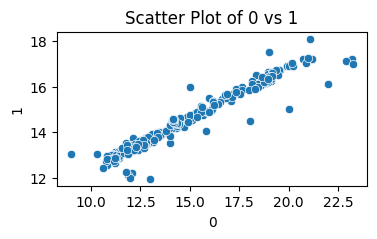

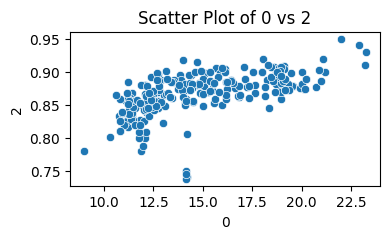

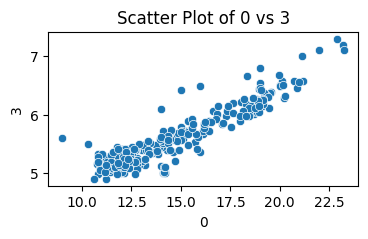

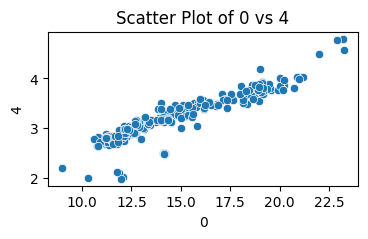

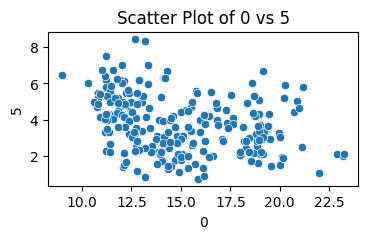

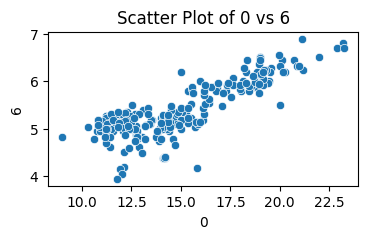

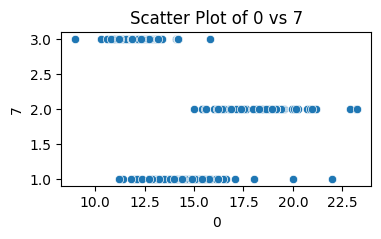

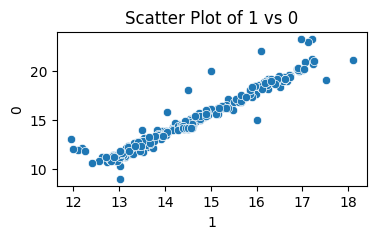

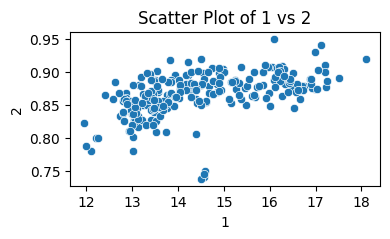

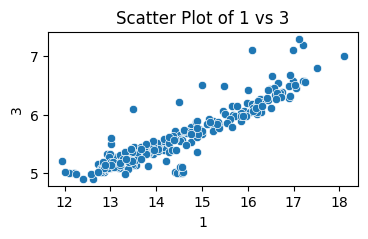

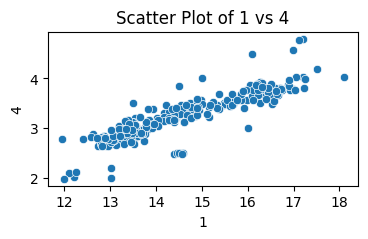

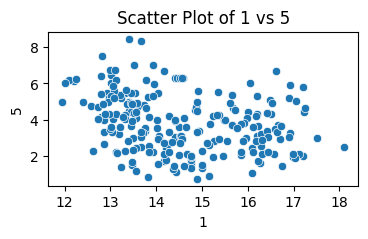

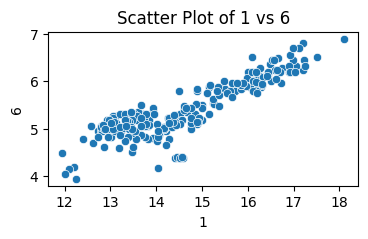

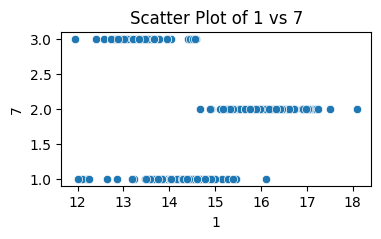

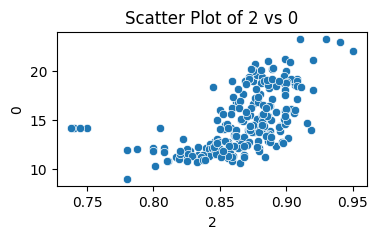

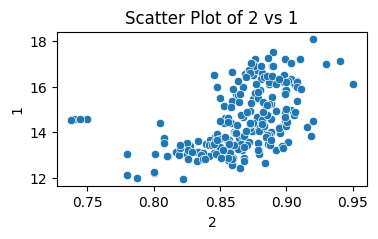

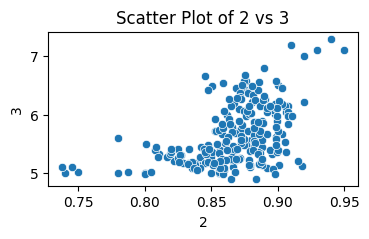

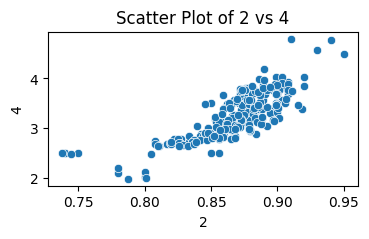

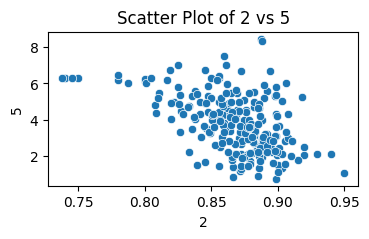

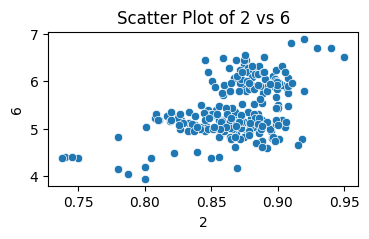

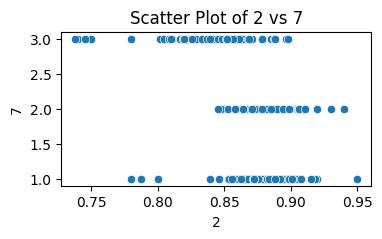

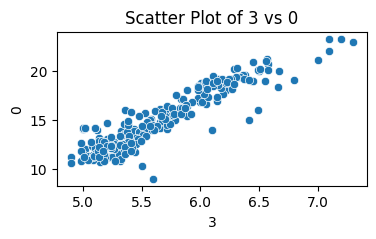

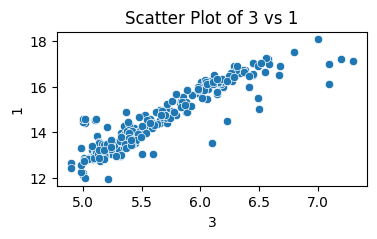

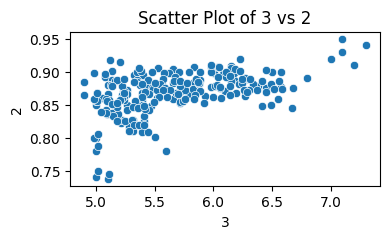

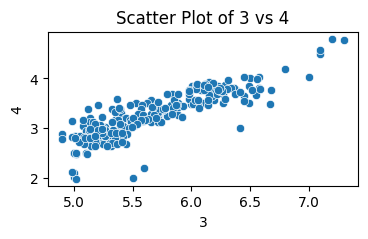

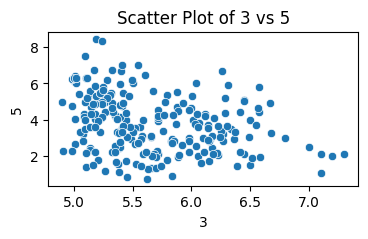

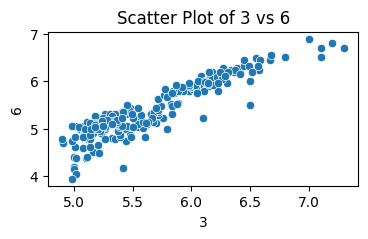

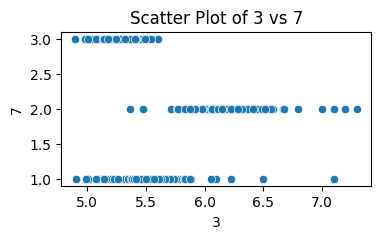

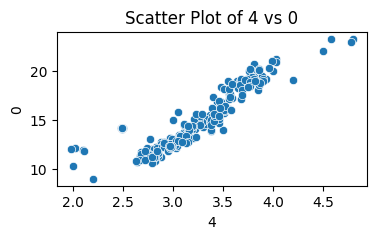

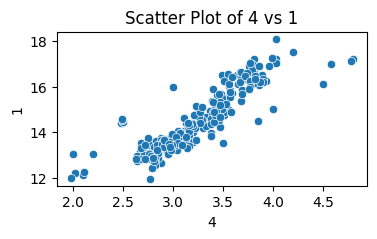

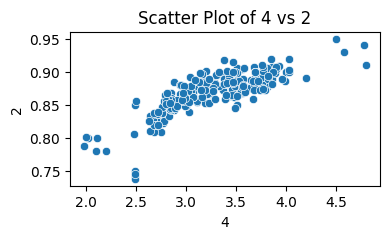

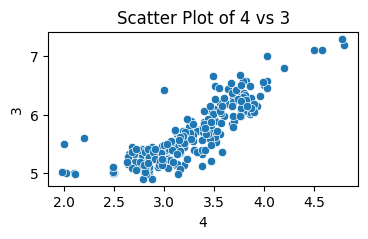

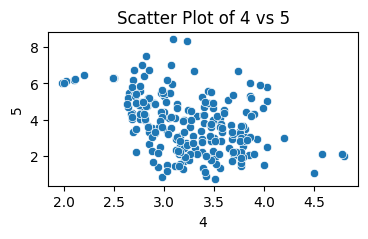

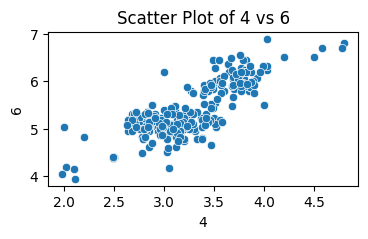

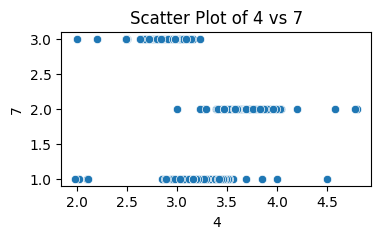

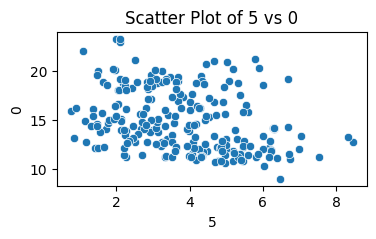

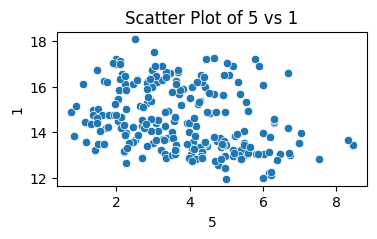

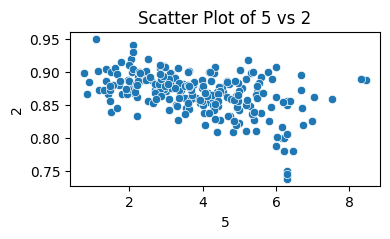

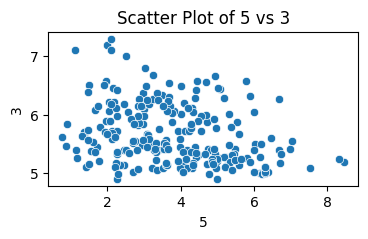

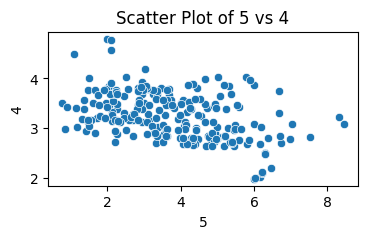

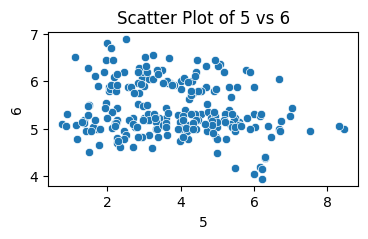

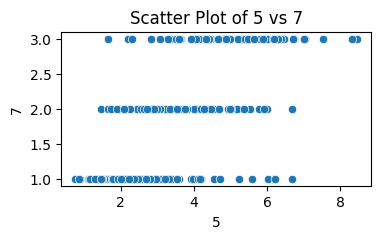

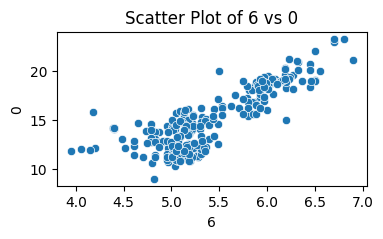

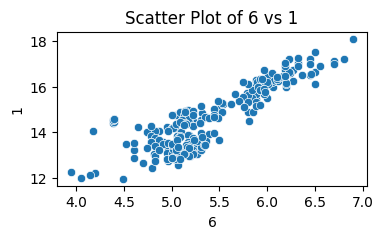

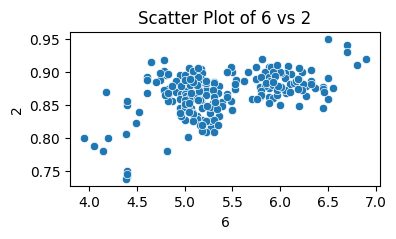

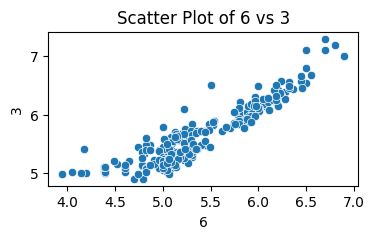

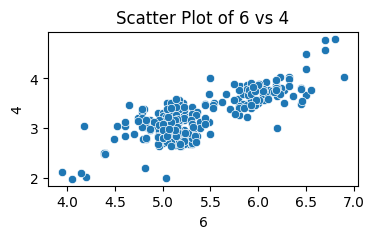

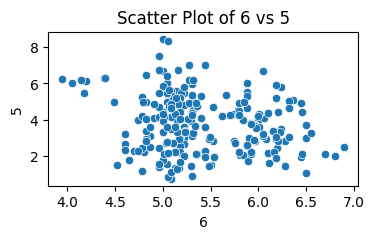

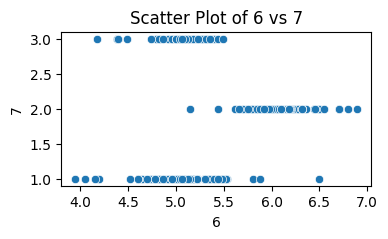

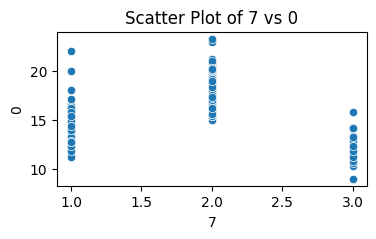

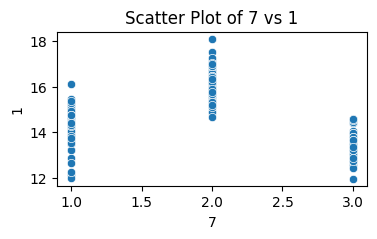

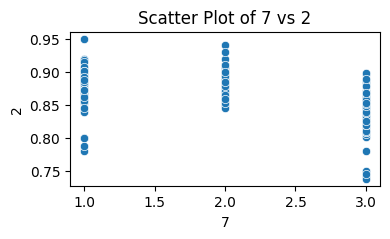

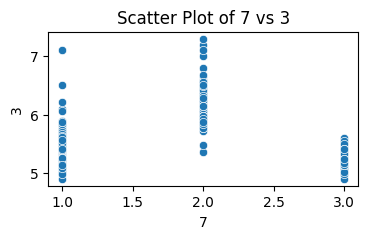

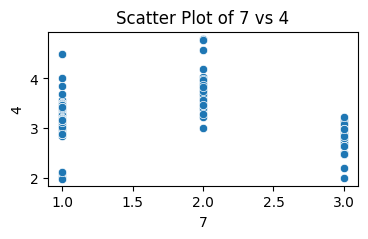

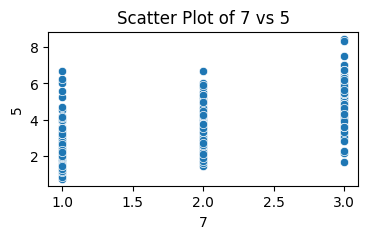

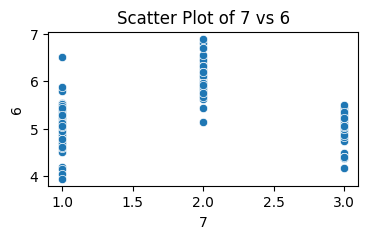

In [12]:
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if i != j :
         plt.figure(figsize=(4, 2))  
         sbn.scatterplot(x=data[data.columns[i]], y=data[data.columns[j]])
         plt.title(f'Scatter Plot of {data.columns[i]} vs {data.columns[j]}')
         plt.xlabel(data.columns[i])
         plt.ylabel(data.columns[j])
         plt.show()

#### 4.

### threshold equal to 2.75

In [23]:
data.iloc[73,-1]

1

In [25]:
class_column = data.columns[-1]

# Group the data by class
grouped_data = data.groupby(class_column)

# Create a dictionary to store outliers for each class
outliers_by_class = {}

# Iterate through each class and detect outliers using the Z-Score method
for class_label, group in grouped_data:
    outliers = {}
    for column in group.columns[:-1]:  # Exclude the class column
        z_scores = np.abs(stats.zscore(group[column]))
        threshold = 2.75  # You can adjust this threshold as needed
        outliers[column] = group[column][z_scores > threshold]
    outliers_by_class[class_label] = outliers

# Print the detected outliers for each class
for class_label, outliers in outliers_by_class.items():
    print(f'Outliers for Class {class_label}:')
    for column, outlier_values in outliers.items():
        if not outlier_values.empty:
            print(f'    In {column}:')
            print(outlier_values)

Outliers for Class 1:
    In 0:
2     22.0
10    20.0
Name: 0, dtype: float64
    In 1:
14    12.0
Name: 1, dtype: float64
    In 2:
0     0.8000
1     0.7800
14    0.7877
65    0.8000
Name: 2, dtype: float64
    In 3:
2     7.1
10    6.5
Name: 3, dtype: float64
    In 4:
0     2.02
1     2.10
2     4.50
14    1.98
65    2.11
Name: 4, dtype: float64
    In 5:
9    6.685
Name: 5, dtype: float64
    In 6:
2     6.50
65    3.95
Name: 6, dtype: float64
Outliers for Class 2:
    In 1:
76    18.1
Name: 1, dtype: float64
    In 2:
86    0.94
Name: 2, dtype: float64
    In 3:
74    7.2
86    7.3
Name: 3, dtype: float64
    In 4:
74     4.80
86     4.78
149    4.58
Name: 4, dtype: float64
    In 6:
76     6.895
134    5.144
Name: 6, dtype: float64
Outliers for Class 3:
    In 0:
154     9.00
155    15.82
Name: 0, dtype: float64
    In 1:
153    11.95
Name: 1, dtype: float64
    In 2:
195    0.740
196    0.750
197    0.738
204    0.745
Name: 2, dtype: float64
    In 4:
152    2.0
154    2.2
Name

In [24]:
outliers1 = {}
outliers2 = {}
outliers3 = {}
for i in data.shape[0] :
    for j in range [0,2] :
         if data.iloc[j,-1] :
             z_scores = np.abs(stats.zscore(data[column]))
             threshold = 2.75  
             outliers1[column] = data[column][z_scores > threshold]
        

print (outliers1)

TypeError: 'int' object is not iterable

In [15]:
outliers = {}
for column in data.columns:
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 2.75  
    outliers[column] = data[column][z_scores > threshold]

# Print the detected outliers
for column, outlier_values in outliers.items():
    print(f'Outliers in {column}:')
    print(outlier_values)

Outliers in 0:
Series([], Name: 0, dtype: float64)
Outliers in 1:
Series([], Name: 1, dtype: float64)
Outliers in 2:
195    0.740
196    0.750
197    0.738
204    0.745
Name: 2, dtype: float64
Outliers in 3:
2      7.1
74     7.2
86     7.3
149    7.1
Name: 3, dtype: float64
Outliers in 4:
74     4.80
86     4.78
149    4.58
Name: 4, dtype: float64
Outliers in 5:
225    8.456
229    8.315
Name: 5, dtype: float64
Outliers in 6:
Series([], Name: 6, dtype: float64)
Outliers in 7:
Series([], Name: 7, dtype: int64)


### threshold equal to 2.5

In [8]:
outliers = {}
for column in data.columns:
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 2.5  
    outliers[column] = data[column][z_scores > threshold]

# Print the detected outliers
for column, outlier_values in outliers.items():
    print(f'Outliers in {column}:')
    print(outlier_values)

Outliers in 0:
74     23.20
86     22.90
149    23.25
Name: 0, dtype: float64
Outliers in 1:
76    18.1
Name: 1, dtype: float64
Outliers in 2:
1      0.780
2      0.950
154    0.780
195    0.740
196    0.750
197    0.738
204    0.745
Name: 2, dtype: float64
Outliers in 3:
2      7.1
74     7.2
76     7.0
86     7.3
149    7.1
Name: 3, dtype: float64
Outliers in 4:
0      2.02
2      4.50
14     1.98
74     4.80
86     4.78
149    4.58
152    2.00
Name: 4, dtype: float64
Outliers in 5:
225    8.456
229    8.315
Name: 5, dtype: float64
Outliers in 6:
76    6.895
Name: 6, dtype: float64
Outliers in 7:
Series([], Name: 7, dtype: int64)


### threshold equal to 3

In [9]:
outliers = {}
for column in data.columns:
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 3 
    outliers[column] = data[column][z_scores > threshold]

# Print the detected outliers
for column, outlier_values in outliers.items():
    print(f'Outliers in {column}:')
    print(outlier_values)

Outliers in 0:
Series([], Name: 0, dtype: float64)
Outliers in 1:
Series([], Name: 1, dtype: float64)
Outliers in 2:
195    0.740
196    0.750
197    0.738
204    0.745
Name: 2, dtype: float64
Outliers in 3:
74    7.2
86    7.3
Name: 3, dtype: float64
Outliers in 4:
74    4.80
86    4.78
Name: 4, dtype: float64
Outliers in 5:
Series([], Name: 5, dtype: float64)
Outliers in 6:
Series([], Name: 6, dtype: float64)
Outliers in 7:
Series([], Name: 7, dtype: int64)


### 7.

### 8.

The Interquartile Range (IQR) Method:

Calculate the 1st quartile (Q1) and 3rd quartile (Q3) of the data set
IQR = Q3 - Q1
Define lower and upper bounds:
Lower bound: Q1 - 1.5*IQR
Upper bound: Q3 + 1.5*IQR
Any data points below the lower bound or above the upper bound are considered outliers.
The key steps are:

Calculate Q1 and Q3
Compute IQR by subtracting Q1 from Q3
Set lower and upper bounds based on the IQR
Label points outside bounds as outliers
The IQR method is more robust to outliers compared to using standard deviation in the z-score method. It gives a sense of the spread of the middle 50% of the data rather than being influenced by extreme values. This makes it better for detecting outliers in skewed distributions.

Boxplot Method - Plot boxplot for the data and points outside 1.5 times the interquartile range are potential outliers.

Grubb's Test - Calculate the z-score for each data point and compare to a threshold. Points with a z-score higher than the threshold are deemed outliers
.
Tukey's Method - Calculate the Interquartile Range (IQR) and consider points below Q1 - 1.5IQR or above Q3 + 1.5IQR as outlier
s.
Deviations from Mean - Calculate mean and standard deviation. Points outside a threshold number of standard deviations from the mean are flagged as outlie
rs.
Mahalanobis Distance - Measures distance of point from center of data distribution. Outliers have a large Mahalanobis distance. Effective for multivariate d
ata.
Local Outlier Factor (LOF) - Unsupervised ML algorithm that assigns each data point a score based on local density. Points with high scores are outl
iers.
Isolation Forest - Unsupervised ML algorithm that isolates anomalies. Effectively detects global and local outliers.

### 9.

In [10]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

# 2.2

### 1.

In [24]:
# Import necessary functions from functions.py
from functions1 import logistic_regression, predict, accuracy

import numpy as np 

# Function to load data
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter='\t')  # Assuming tab-delimited data
    X = data[:, :-1]  # Features
    y = data[:, -1]  # Labels
    return X, y

# Implementing OvO classification
def ovo_classification(X, y, iterations=1000, learning_rate=0.01):
    classes = np.unique(y)
    classifiers = {}
    num_classes = len(classes)

    for i in range(num_classes):
        for j in range(i+1, num_classes):
            class1, class2 = classes[i], classes[j]
            idx = np.where((y == class1) | (y == class2))
            X_pair, y_pair = X[idx], y[idx]
            y_binary = np.where(y_pair == class1, 1, 0)

            weights, bias = logistic_regression(X_pair, y_binary, iterations, learning_rate)
            classifiers[(class1, class2)] = (weights, bias)

    return classifiers

# Main function to execute the OvO classification
def main():
    # Load data from the provided dataset
    X, y = load_data(r'C:\Users\sepito\Documents\Python Scripts\PatternRecognition\HW2\data.txt')  # Replace with the correct path to your data file

    # Train OvO classifiers
    ovo_classifiers = ovo_classification(X, y)
    return ovo_classifiers

# Execute the main function and get the classifiers
ovo_classifiers = main()

# Output a summary of the trained classifiers
ovo_classifiers_summary = {k: (v[0].shape, v[1]) for k, v in ovo_classifiers.items()}
ovo_classifiers_summary


{(1.0, 2.0): ((7,), 0.25468213753323476),
 (1.0, 3.0): ((7,), -0.06774278230115957),
 (2.0, 3.0): ((7,), -0.18690805384867448)}

In [25]:
# Implementing OvA classification
def ova_classification(X, y, iterations=1000, learning_rate=0.01):
    classes = np.unique(y)
    classifiers = {}

    for class_ in classes:
        # Create a binary classification problem for the current class
        y_binary = np.where(y == class_, 1, 0)

        # Train logistic regression for the current class
        weights, bias = logistic_regression(X, y_binary, iterations, learning_rate)
        classifiers[class_] = (weights, bias)

    return classifiers

# Main function to execute the OvA classification
def main():
    # Load data from the provided dataset
    X, y = load_data(r'C:\Users\sepito\Documents\Python Scripts\PatternRecognition\HW2\data.txt')  # Replace with the correct path to your data file

    # Train OvA classifiers
    ova_classifiers = ova_classification(X, y)
    return ova_classifiers

# Execute the main function and get the classifiers
ova_classifiers = main()

# Output a summary of the trained classifiers
ova_classifiers_summary = {k: (v[0].shape, v[1]) for k, v in ova_classifiers.items()}
ova_classifiers_summary

{1.0: ((7,), 0.11693665583293593),
 2.0: ((7,), -0.2282581593026409),
 3.0: ((7,), 0.10824181579326006)}

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from functions1 import logistic_regression, predict, accuracy

# Assuming load_data is defined as before
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter='\t')  # Assuming tab-delimited data
    X = data[:, :-1]  # Features
    y = data[:, -1]  # Labels
    return X, y

# Function to split the dataset into training and test sets
def split_data(X, y, test_size=0.3):
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Implementing OvA classification
def ova_classification(X, y, iterations=1000, learning_rate=0.01):
    classes = np.unique(y)
    classifiers = {}
    for class_ in classes:
        y_binary = (y == class_).astype(int)
        weights, bias = logistic_regression(X, y_binary, iterations, learning_rate)
        classifiers[class_] = (weights, bias)
    return classifiers

# Function to evaluate the classifiers
def evaluate_classifiers_ova(classifiers, X_train, y_train, X_test, y_test):
    accuracies = {}
    for class_, (weights, bias) in classifiers.items():
        y_train_binary = (y_train == class_).astype(int)
        y_test_binary = (y_test == class_).astype(int)

        y_pred_train = predict(X_train, weights, bias)
        train_accuracy = accuracy(y_train_binary, y_pred_train)

        y_pred_test = predict(X_test, weights, bias)
        test_accuracy = accuracy(y_test_binary, y_pred_test)

        accuracies[class_] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}
    return accuracies

# Main function for OvA
def main_ova(file_path):
    X, y = load_data(file_path)
    X_train, X_test, y_train, y_test = split_data(X, y)
    classifiers = ova_classification(X_train, y_train)
    accuracies = evaluate_classifiers_ova(classifiers, X_train, y_train, X_test, y_test)
    return accuracies

# Path to the data file
file_path = r'C:\Users\sepito\Documents\Python Scripts\PatternRecognition\HW2\data.txt'  # Replace with the correct path

# Calculate accuracies for OvA
accuracies_ova = main_ova(file_path)
accuracies_ova


{1.0: {'train_accuracy': 0.8209876543209876,
  'test_accuracy': 0.7714285714285715},
 2.0: {'train_accuracy': 0.9012345679012346, 'test_accuracy': 0.9},
 3.0: {'train_accuracy': 0.9197530864197531,
  'test_accuracy': 0.9428571428571428}}

In [32]:
# Function to implement OvO classification
def ovo_classification(X, y, iterations=1000, learning_rate=0.01):
    classes = np.unique(y)
    classifiers = {}
    for i, class1 in enumerate(classes):
        for class2 in classes[i+1:]:
            # Binary classification for each pair of classes
            idx = np.where((y == class1) | (y == class2))
            X_pair, y_pair = X[idx], y[idx]
            y_binary = np.where(y_pair == class1, 1, 0)

            weights, bias = logistic_regression(X_pair, y_binary, iterations, learning_rate)
            classifiers[(class1, class2)] = (weights, bias)
    return classifiers

# Function to evaluate OvO classifiers
def evaluate_classifiers_ovo(classifiers, X, y):
    classes = np.unique(y)
    num_classes = len(classes)
    predictions = np.zeros((X.shape[0], num_classes))

    # Generate predictions for each classifier
    for (class1, class2), (weights, bias) in classifiers.items():
        idx1, idx2 = np.where(classes == class1)[0][0], np.where(classes == class2)[0][0]
        preds = predict(X, weights, bias).astype(int)
        predictions[:, idx1] += preds
        predictions[:, idx2] += (1 - preds)

    # Final prediction is the class with the most votes
    final_predictions = classes[np.argmax(predictions, axis=1)]
    return accuracy(y, final_predictions)

# Main function for OvO
def main_ovo(file_path):
    X, y = load_data(file_path)
    X_train, X_test, y_train, y_test = split_data(X, y)
    classifiers = ovo_classification(X_train, y_train)
    train_accuracy = evaluate_classifiers_ovo(classifiers, X_train, y_train)
    test_accuracy = evaluate_classifiers_ovo(classifiers, X_test, y_test)
    return {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

# Calculate accuracies for OvA and OvO
accuracies_ova = main_ova(file_path)
accuracies_ovo = main_ovo(file_path)

accuracies_ova, accuracies_ovo


({1.0: {'train_accuracy': 0.8209876543209876,
   'test_accuracy': 0.7714285714285715},
  2.0: {'train_accuracy': 0.9012345679012346, 'test_accuracy': 0.9},
  3.0: {'train_accuracy': 0.9197530864197531,
   'test_accuracy': 0.9428571428571428}},
 {'train_accuracy': 0.8641975308641975, 'test_accuracy': 0.8428571428571429})